In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


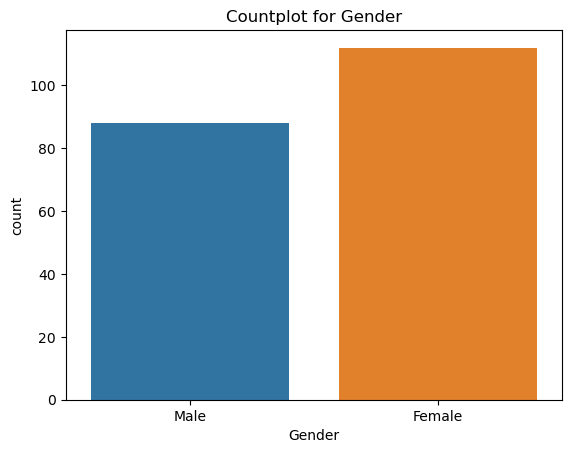

In [6]:
sb.countplot(data = df, x = 'Gender')
plt.title('Countplot for Gender')
plt.show()

In [7]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
labels = gender_counts.index
labels

Index(['Female', 'Male'], dtype='object', name='Gender')

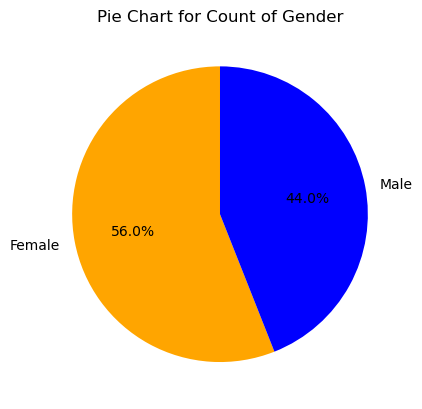

In [9]:
colors = ['orange' if label == 'Female' else 'blue' for label in labels] 
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index, startangle = 90, autopct = '%1.1f%%', colors = colors)
plt.title('Pie Chart for Count of Gender')
plt.show()

In [10]:
features = df.columns
features

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

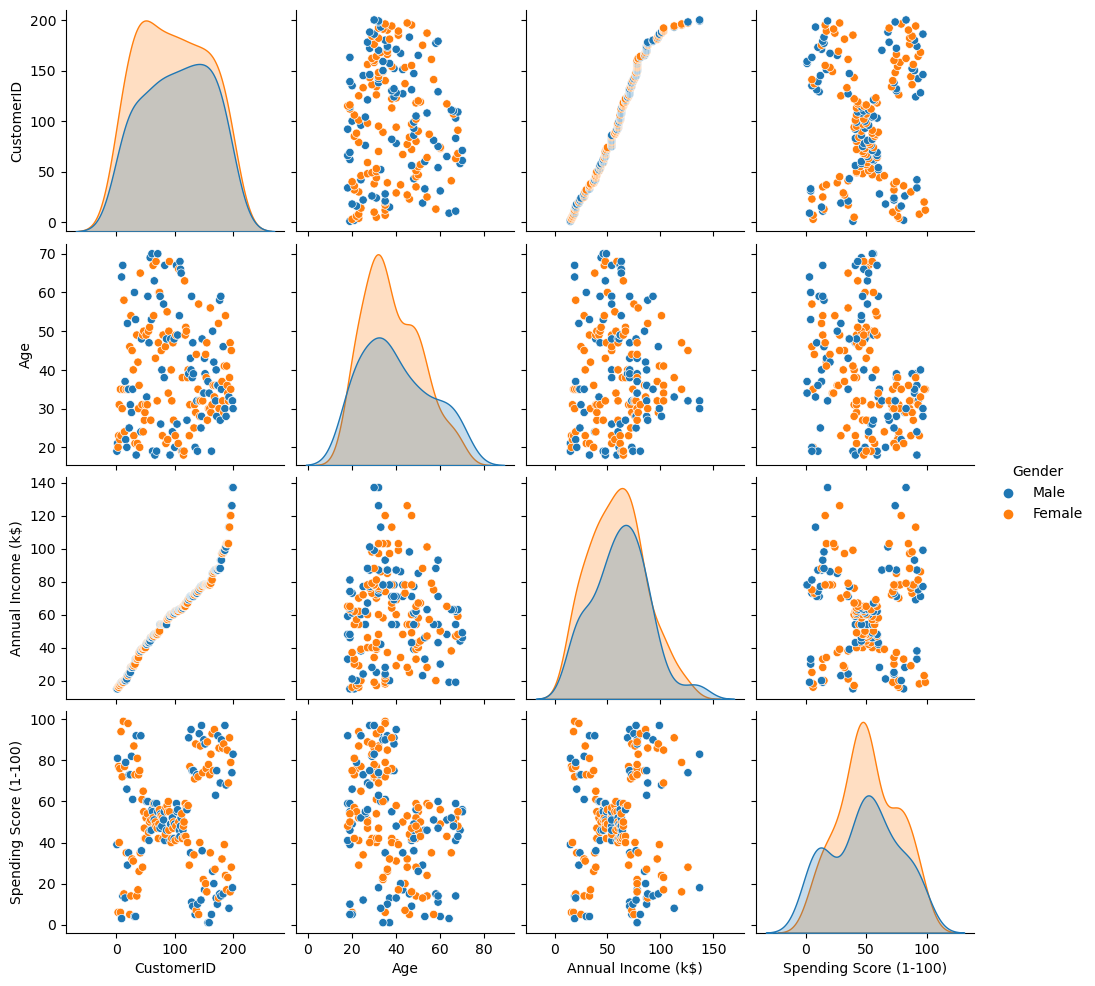

In [11]:
sb.pairplot(data = df, hue = 'Gender')
plt.show()

In [12]:
df_numeric = df.select_dtypes(int)
df_numeric.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

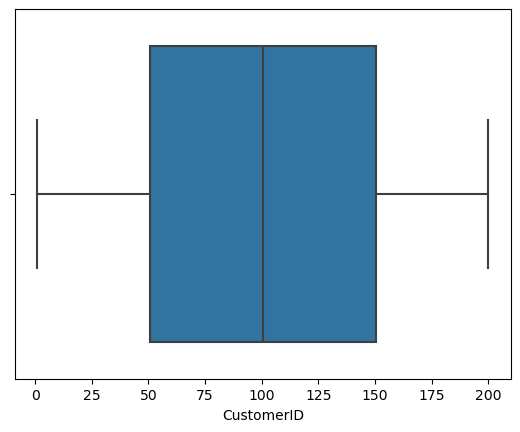

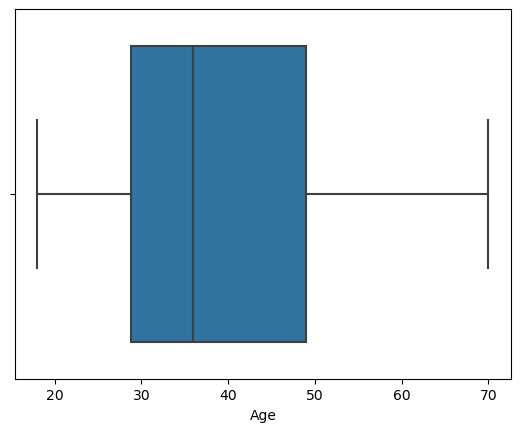

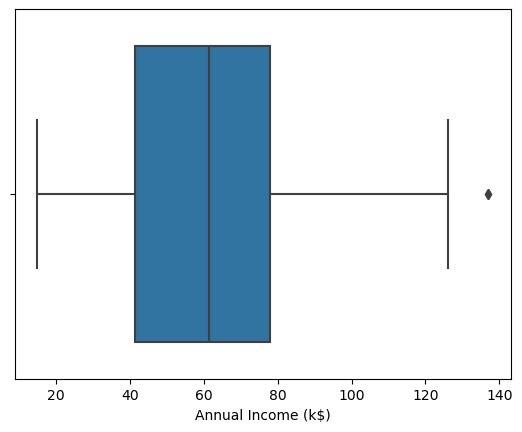

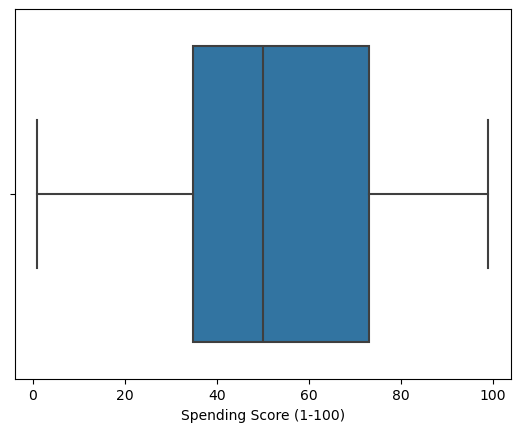

In [13]:
numeric_features = df_numeric.columns
for feature in numeric_features:
    sb.boxplot(data = df_numeric, x = feature)
    plt.show()

In [14]:
corr_matrix = df_numeric.drop('CustomerID', axis = 1).corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


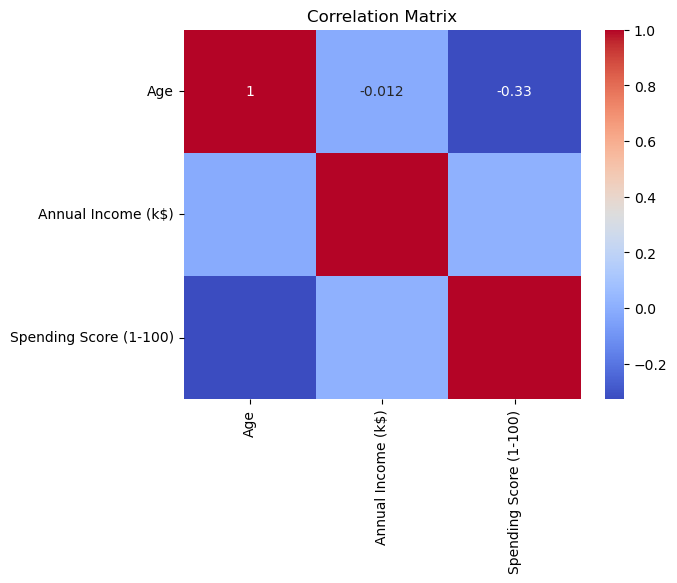

In [15]:
sb.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
X = df_numeric[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [18]:
X_scaled[:, :]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [19]:
X_scaled[:, 0]

array([-1.73899919, -1.73899919, -1.70082976, -1.70082976, -1.66266033,
       -1.66266033, -1.62449091, -1.62449091, -1.58632148, -1.58632148,
       -1.58632148, -1.58632148, -1.54815205, -1.54815205, -1.54815205,
       -1.54815205, -1.50998262, -1.50998262, -1.43364376, -1.43364376,
       -1.39547433, -1.39547433, -1.3573049 , -1.3573049 , -1.24279661,
       -1.24279661, -1.24279661, -1.24279661, -1.20462718, -1.20462718,
       -1.16645776, -1.16645776, -1.05194947, -1.05194947, -1.05194947,
       -1.05194947, -1.01378004, -1.01378004, -0.89927175, -0.89927175,
       -0.86110232, -0.86110232, -0.82293289, -0.82293289, -0.82293289,
       -0.82293289, -0.78476346, -0.78476346, -0.78476346, -0.78476346,
       -0.70842461, -0.70842461, -0.67025518, -0.67025518, -0.67025518,
       -0.67025518, -0.63208575, -0.63208575, -0.55574689, -0.55574689,
       -0.55574689, -0.55574689, -0.51757746, -0.51757746, -0.47940803,
       -0.47940803, -0.47940803, -0.47940803, -0.47940803, -0.47

In [20]:
X_scaled[:, 1]

array([-0.43480148,  1.19570407, -1.71591298,  1.04041783, -0.39597992,
        1.00159627, -1.71591298,  1.70038436, -1.83237767,  0.84631002,
       -1.4053405 ,  1.89449216, -1.36651894,  1.04041783, -1.44416206,
        1.11806095, -0.59008772,  0.61338066, -0.82301709,  1.8556706 ,
       -0.59008772,  0.88513158, -1.75473454,  0.88513158, -1.4053405 ,
        1.23452563, -0.7065524 ,  0.41927286, -0.74537397,  1.42863343,
       -1.7935561 ,  0.88513158, -1.7935561 ,  1.62274124, -1.4053405 ,
        1.19570407, -1.28887582,  0.88513158, -0.93948177,  0.96277471,
       -0.59008772,  1.62274124, -0.55126616,  0.41927286, -0.86183865,
        0.5745591 ,  0.18634349, -0.12422899, -0.3183368 , -0.3183368 ,
        0.06987881,  0.38045129,  0.14752193,  0.38045129, -0.20187212,
       -0.35715836, -0.00776431, -0.16305055,  0.03105725, -0.16305055,
        0.22516505,  0.18634349,  0.06987881,  0.34162973,  0.03105725,
        0.34162973, -0.00776431, -0.08540743,  0.34162973, -0.12

In [21]:
k_means = KMeans(n_clusters = 3, random_state = 42)
k_means.fit(X_scaled)
clusters = k_means.predict(X_scaled)
df['Clusters'] = clusters
df.head()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [22]:
print('K-Means Inertial:', k_means.inertia_)
print('Silhouette Score:', silhouette_score(X_scaled, clusters))

K-Means Inertial: 157.70400815035947
Silhouette Score: 0.46658474419000145


### Opimal Number of Clusters

In [23]:
def optimal_clusters(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        k_means = KMeans(n_clusters = k, random_state = 42)
        k_means.fit(data)
        means.append(k)
        inertias.append(k_means.inertia_)

    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid()
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

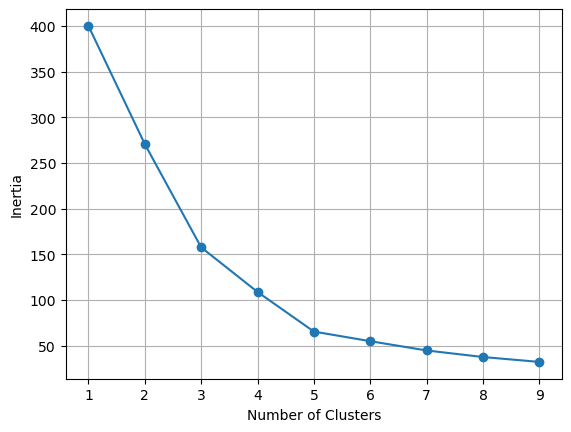

In [24]:
optimal_clusters(X_scaled, 10)

In [25]:
k_means = KMeans(n_clusters = 5, random_state = 42)
k_means.fit(X_scaled)
clusters = k_means.predict(X_scaled)
df['Clusters'] = clusters
df.head()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [26]:
print('Optimal K-Means Inertia:', k_means.inertia_)
print('Optimal Silhouette Score:', silhouette_score(X_scaled, clusters))

Optimal K-Means Inertia: 65.56840815571681
Optimal Silhouette Score: 0.5546571631111091


In [27]:
k_means.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

In [28]:
k_means.cluster_centers_[:, 0] # x coordinates

array([-0.20091257,  1.05500302, -1.30751869, -1.32954532,  0.99158305])

In [29]:
k_means.cluster_centers_[:, 1] # y coordinates

array([-0.02645617, -1.28443907, -1.13696536,  1.13217788,  1.23950275])

In [30]:
cluster_labels = {
    0: 'Low Income, Low Spending',
    1: 'High Income, Low Spending',
    2: 'Average Income, Average Spending',
    3: 'High Income, High Spending',
    4: 'Low Income, High Spending'
}

# Map the cluster numbers to the descriptive labels
df['Cluster Labels'] = df['Clusters'].map(cluster_labels)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Cluster Labels
0,1,Male,19,15,39,2,"Average Income, Average Spending"
1,2,Male,21,15,81,3,"High Income, High Spending"
2,3,Female,20,16,6,2,"Average Income, Average Spending"
3,4,Female,23,16,77,3,"High Income, High Spending"
4,5,Female,31,17,40,2,"Average Income, Average Spending"


In [31]:
centroids = k_means.cluster_centers_
centroids

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

In [32]:
for centroid in (centroids):
    print(centroid[0])

-0.20091256569971444
1.0550030223077878
-1.3075186893850437
-1.329545316496027
0.9915830476839198


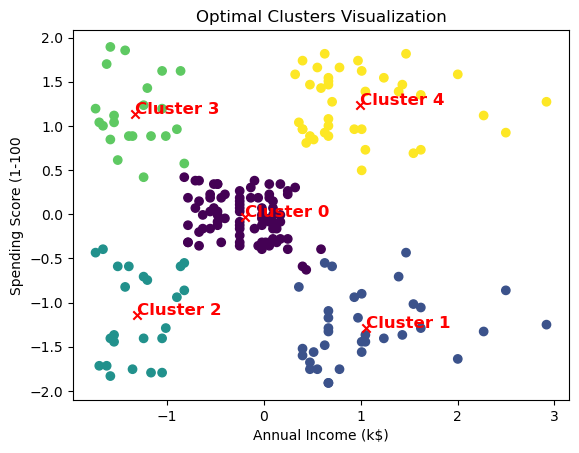

In [41]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, cmap = 'viridis', marker = 'o')
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red', marker = 'x', label = 'Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i}', color = 'red', fontweight = 'bold', fontsize = 12)
plt.title('Optimal Clusters Visualization')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.show()

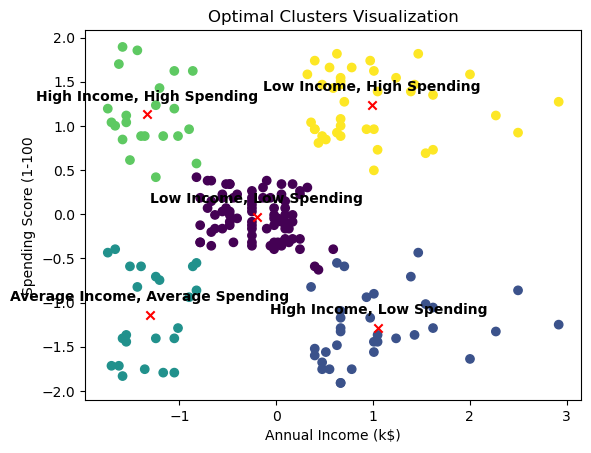

In [42]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, cmap = 'viridis', marker = 'o')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', marker = 'x', label = 'Centroids')

for i, centroid in enumerate(centroids):
    plt.annotate(cluster_labels[i], (centroid[0], centroid[1]), textcoords = 'offset points', xytext = (0, 10), color = 'black', ha = 'center', fontsize = 10, weight = 'bold')

plt.title('Optimal Clusters Visualization')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.show()